In [75]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [76]:
hitter = pd.read_csv('Hitters.csv')

Drop non-numerical columns in the dataset, and drop all NaNs

In [77]:
hitter = hitter.drop(['Unnamed: 0', 'League', 'Division', 'NewLeague'], axis = 1)

In [78]:
hitter = hitter.dropna()

Select the Salary(X) from the other predictors(Y) columns

In [79]:
x = hitter.iloc[:, :-1]
y = hitter.iloc[:, 16]

**Lasso Regression**

In [114]:
params = np.linspace(0,20,200)
lasso = Lasso(max_iter = 2e4, normalize = True)
coeffs = []

for num in params:
    lasso.set_params(alpha = num)
    lasso.fit(x,y)
    coeffs.append(lasso.coef_)

/Users/nuotian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/Users/nuotian/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/nuotian/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12585154.719803449, tolerance: 5331.911278864535
  positive)


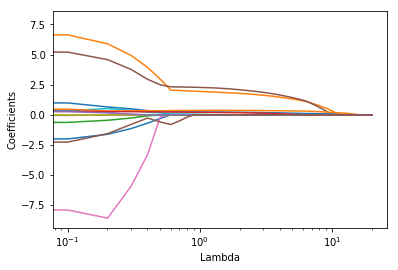

In [115]:
pt = plt.gca()
pt.plot(params, coeffs)
pt.set_xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.show()

From the plot above, we could see that before alpha reaches to 10, there are more than 3 predictors that remain in the model. Below, I will check how the coefficients of the predictors changed when lambda equals to 10.

In [116]:
lasso = Lasso(max_iter = 2e4, normalize = True)
lasso.set_params(alpha = 10)
lasso.fit(x,y)
print(pd.Series(lasso.coef_, index = x.columns))

AtBat      0.000000
Hits       0.329475
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.076322
CRBI       0.204475
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64


From the result above, we could see that the final three predictors are Hits, CRuns and CRBI.

**To find the optimal value of the regularization penality using cross validation **

In [117]:
lassocv = LassoCV(cv = 10, max_iter = 2e4, normalize = True)
lassocv.fit(x, y)
lasso.set_params(alpha = lassocv.alpha_)

Lasso(alpha=0.0635481759985745, copy_X=True, fit_intercept=True,
      max_iter=20000.0, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [118]:
lasso.fit(x,y)
pd.Series(lasso.coef_, index = x.columns)

AtBat     -2.082954
Hits       7.041011
HmRun      0.000000
Runs      -0.682615
RBI        0.496552
Walks      5.511781
Years     -6.107625
CAtBat    -0.087066
CHits      0.000000
CHmRun     0.156468
CRuns      1.228061
CRBI       0.583821
CWalks    -0.690601
PutOuts    0.292694
Assists    0.304372
Errors    -2.450795
dtype: float64

In [119]:
print('the optimal value of the regularization penalty is', lassocv.alpha_)
print('there are', np.sum(lasso.coef_!=0),'predictors left')

the optimal value of the regularization penalty is 0.0635481759985745
there are 14 predictors left


**Ridge Regression **

In [126]:
params = np.logspace(-5,5,200)
ridge = Ridge(max_iter = 2e4, normalize = True)
coeffs = []

for num in params:
    ridge.set_params(alpha = num)
    ridge.fit(x,y)
    coeffs.append(ridge.coef_)

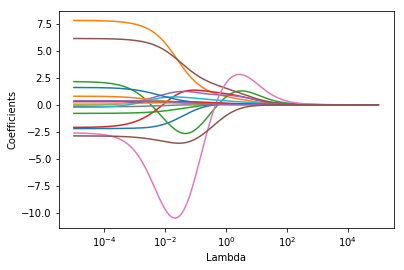

In [127]:
pt = plt.gca()
pt.plot(params, coeffs)
pt.set_xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.show()

In [136]:
ridgecv = RidgeCV(alphas = params, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(x, y)
ridge.set_params(alpha = ridgecv.alpha_)

Ridge(alpha=0.01162322468679853, copy_X=True, fit_intercept=True,
      max_iter=20000.0, normalize=True, random_state=None, solver='auto',
      tol=0.001)

In [137]:
print('the optimal value of the regularization penalty is', ridgecv.alpha_)

the optimal value of the regularization penalty is 0.01162322468679853


In [138]:
ridge.fit(x,y)
pd.Series(ridge.coef_, index = x.columns)

AtBat     -1.700238
Hits       5.489607
HmRun     -1.623744
Runs       0.328031
RBI        1.039454
Walks      4.912609
Years     -9.975255
CAtBat    -0.053294
CHits      0.175061
CHmRun     0.710317
CRuns      0.706334
CRBI       0.336152
CWalks    -0.534752
PutOuts    0.288814
Assists    0.290802
Errors    -3.445539
dtype: float64

All predictors are kept in the model since Ridge regression wouldn't eliminate any predictors but constrain them getting closer to zero.

**Short Answer**

Explain in your own words the bias-variance tradeoff. 

The bias-variance tradeoff is the way to describe the relationship between model accuracy and model robustness. For example, if the model is very flexible, the accuray of this prediction model will be high, but it might be to detail to fit other data. (High variance). But, if the model is too general, it wouldn't tell the different between different dataset, it will also lead to a lower model performance.(High bias). In general, we are aiming for a low variance and a low bias model.

What role does regularization play in this tradeoff? Make reference to your findings
in number (1) to describe models of high/low bias and variance.

Regulation is a way to constrain the model and solve the overfitting problem by applying a penalty parameter to the coeffients. 

See the two plots above, on the left side are those with a small penalty value applied. And for those parts of the graphs, the coefficients have a large variablility. But for those with a decent penalty value applied, the coefficients are constrained into a reasonable range. 